# Accessing the data

I want to access the package and use it to run some analysis of Lionel Messi's performances in La Liga.

In [1]:
library(StatsBombR)

Loading required package: dplyr

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: stringi
Loading required package: stringr
Loading required package: tibble
Loading required package: rvest
Loading required package: xml2
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
Loading required package: RCurl
Loading required package: bitops
Loading required package: doParallel
Loading required package: foreach
Loading required package: iterators
Loading required package: parallel
Loading required package: httr
Loading required package: jsonlite
Loading required package: purrr

Attaching package: 'purrr'

The following object is masked from 'package:jsonlite':

    flatten

The following objects are masked from 'package:foreach':

    accumulate, when

The following object is mas

### Competition data

In [2]:
comp <- FreeCompetitions()
comp

[1] "Whilst we are keen to share data and facilitate research, we also urge you to be responsible with the data. Please register your details on https://www.statsbomb.com/resource-centre and read our User Agreement carefully."


competition_id,season_id,country_name,competition_name,competition_gender,season_name,match_updated,match_available
37,42,England,FA Women's Super League,female,2019/2020,2019-09-11T15:56:40.257,2019-09-11T15:56:40.257
37,4,England,FA Women's Super League,female,2018/2019,2019-06-23T15:32:29.914,2019-06-23T15:32:29.914
43,3,International,FIFA World Cup,male,2018,2019-06-23T12:38:35.142,2019-06-23T12:38:35.142
11,27,Spain,La Liga,male,2015/2016,2019-07-29T20:44:30.861,2019-07-29T20:44:30.861
11,26,Spain,La Liga,male,2014/2015,2019-07-30T12:42:05.563,2019-07-30T12:42:05.563
11,25,Spain,La Liga,male,2013/2014,2019-07-24T19:44:48.866,2019-07-24T19:44:48.866
11,24,Spain,La Liga,male,2012/2013,2019-07-29T17:46:18.935,2019-07-29T17:46:18.935
11,23,Spain,La Liga,male,2011/2012,2019-08-27T09:48:17.842,2019-08-27T09:48:17.842
11,22,Spain,La Liga,male,2010/2011,2019-08-01T17:44:54.870,2019-08-01T17:44:54.870
11,21,Spain,La Liga,male,2009/2010,2019-07-11T07:44:14.533,2019-07-11T07:44:14.533


Now filter out any other competitions

In [3]:
comp <- comp[comp$competition_id == 11, ]
comp

,competition_id,season_id,country_name,competition_name,competition_gender,season_name,match_updated,match_available
4,11,27,Spain,La Liga,male,2015/2016,2019-07-29T20:44:30.861,2019-07-29T20:44:30.861
5,11,26,Spain,La Liga,male,2014/2015,2019-07-30T12:42:05.563,2019-07-30T12:42:05.563
6,11,25,Spain,La Liga,male,2013/2014,2019-07-24T19:44:48.866,2019-07-24T19:44:48.866
7,11,24,Spain,La Liga,male,2012/2013,2019-07-29T17:46:18.935,2019-07-29T17:46:18.935
8,11,23,Spain,La Liga,male,2011/2012,2019-08-27T09:48:17.842,2019-08-27T09:48:17.842
9,11,22,Spain,La Liga,male,2010/2011,2019-08-01T17:44:54.870,2019-08-01T17:44:54.870
10,11,21,Spain,La Liga,male,2009/2010,2019-07-11T07:44:14.533,2019-07-11T07:44:14.533
11,11,41,Spain,La Liga,male,2008/2009,2019-07-06T22:42:14.468,2019-07-06T22:42:14.468
12,11,40,Spain,La Liga,male,2007/2008,2019-07-04T10:05:48.149,2019-07-04T10:05:48.149
13,11,39,Spain,La Liga,male,2006/2007,2019-07-02T12:37:13.627,2019-07-02T12:37:13.627


### Match data

Let's have a look at the match data next

In [4]:
matches <- FreeMatches(comp)
options(repr.matrix.max.rows=60, repr.matrix.max.cols=40)
nrow(matches)
head(matches, n=5)

[1] "Whilst we are keen to share data and facilitate research, we also urge you to be responsible with the data. Please register your details on https://www.statsbomb.com/resource-centre and read our User Agreement carefully."


[1] 348

match_id,match_date,kick_off,home_score,away_score,match_status,last_updated,match_week,competition.competition_id,competition.country_name,competition.competition_name,season.season_id,season.season_name,home_team.home_team_id,home_team.home_team_name,home_team.home_team_gender,home_team.home_team_group,home_team.managers,home_team.country.id,home_team.country.name,away_team.away_team_id,away_team.away_team_name,away_team.away_team_gender,away_team.away_team_group,away_team.managers,away_team.country.id,away_team.country.name,metadata.data_version,metadata.shot_fidelity_version,competition_stage.id,competition_stage.name,stadium.id,stadium.name,stadium.country.id,stadium.country.name,referee.id,referee.name,referee.country.id,referee.country.name
266310,2016-04-20,20:00:00.000,0,8,available,2019-07-24T16:57:09.139,34,11,Spain,La Liga,27,2015/2016,219,Deportivo La Coruna,male,NA,NULL,214,Spain,217,Barcelona,male,NA,NULL,214,Spain,1.1.0,2,1,Regular Season,4658,Estadio Abanca-Riazor,NA,NA,215,Ricardo De Burgos,112,Italy
266498,2016-03-12,16:00:00.000,6,0,available,2019-07-24T15:24:14.040,29,11,Spain,La Liga,27,2015/2016,217,Barcelona,male,NA,"793 , Luis Enrique MartÃ­nez GarcÃ­a, Luis Enrique , 1970-05-08 , 214 , Spain",214,Spain,216,Getafe,male,NA,"509 , Francisco Escriba Segura, Fran EscribÃ¡ , 1965-05-03 , 214 , Spain",214,Spain,1.1.0,2,1,Regular Season,342,Camp Nou,214,Spain,1015,Pedro PÃ©rez,NA,NA
265839,2016-02-28,20:30:00.000,2,1,available,2019-07-22T14:03:27.572,26,11,Spain,La Liga,27,2015/2016,217,Barcelona,male,NA,"793 , Luis Enrique MartÃ­nez GarcÃ­a, Luis Enrique , 1970-05-08 , 214 , Spain",214,Spain,213,Sevilla,male,NA,"21 , Unai Emery Etxegoien, Unai Emery , 1971-11-03 , 214 , Spain",214,Spain,1.1.0,2,1,Regular Season,342,Camp Nou,214,Spain,217,Santiago Jaime,112,Italy
265958,2016-05-08,17:00:00.000,5,0,available,2019-07-21T23:53:01.973,37,11,Spain,La Liga,27,2015/2016,217,Barcelona,male,NA,"793 , Luis Enrique MartÃ­nez GarcÃ­a, Luis Enrique , 1970-05-08 , 214 , Spain",214,Spain,214,Espanyol,male,NA,"1816 , Constantin GÃ¢lcÄƒ, NA , 1972-03-08 , 187 , Romania",214,Spain,1.1.0,2,1,Regular Season,342,Camp Nou,214,Spain,183,JesÃºs Gil,214,Spain
266106,2016-03-20,16:00:00.000,2,2,available,2019-07-20T09:50:35.712,30,11,Spain,La Liga,27,2015/2016,222,Villarreal,male,NA,"211 , Marcelino GarcÃ­a Toral, NA , 1965-08-14 , 214 , Spain",214,Spain,217,Barcelona,male,NA,"793 , Luis Enrique MartÃ­nez GarcÃ­a, Luis Enrique , 1970-05-08 , 214 , Spain",214,Spain,1.1.0,2,1,Regular Season,361,Estadio de la CerÃ¡mica,214,Spain,220,JosÃ© SÃ¡nchez,112,Italy


What's the distribution of goals in these matches

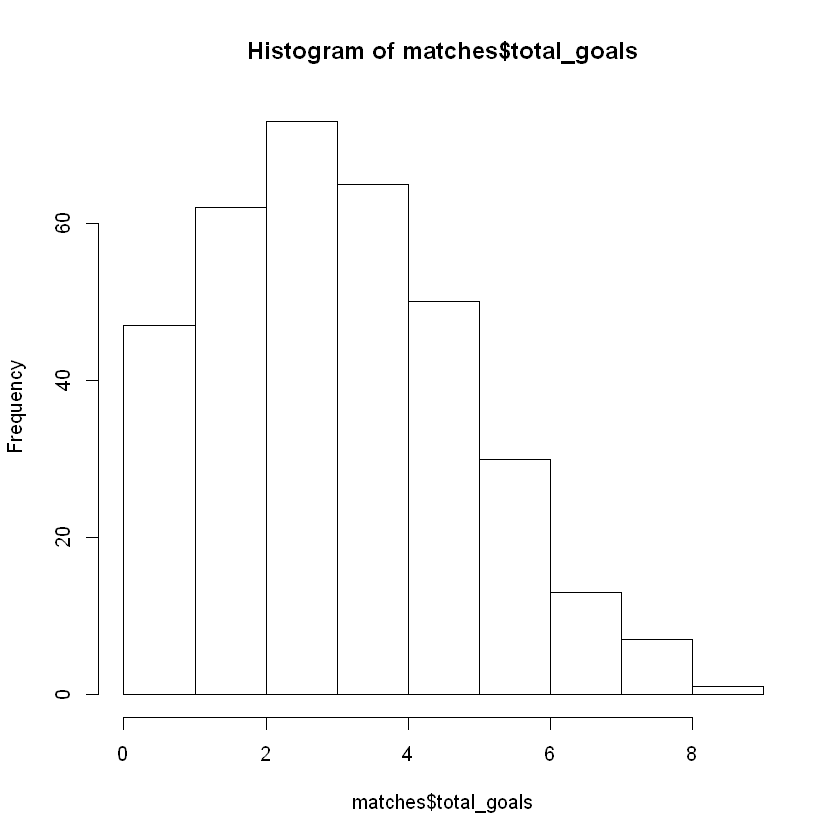

In [5]:
matches["total_goals"] <- matches$home_score + matches$away_score
hist(matches$total_goals, n=10)

When do matches kickoff

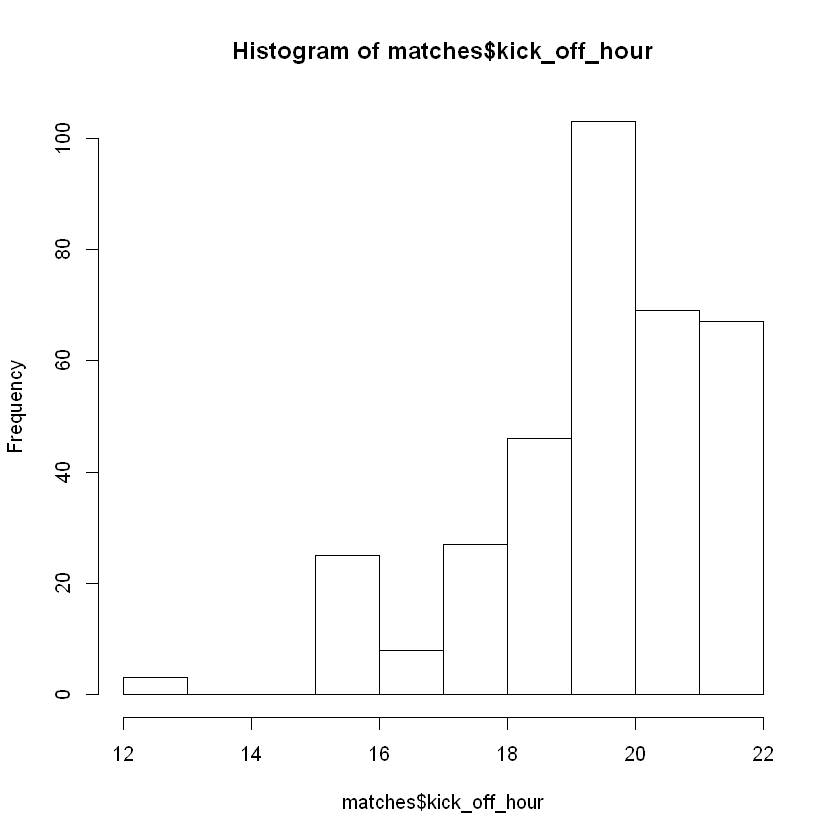

In [6]:
library(stringr)
matches["kick_off_hour"] <- as.numeric(stringr::str_sub(matches$kick_off, start = 1, end = 2))
hist(matches$kick_off_hour, breaks=10)

### Lineup data

What about team lineups

In [7]:
lineups <- StatsBombFreeLineups(matches)
head(lineups[lineups$team_name == "Barcelona", ], n=3)

[1] "Whilst we are keen to share data and facilitate research, we also urge you to be responsible with the data. Please register your details on https://www.statsbomb.com/resource-centre and read our User Agreement carefully."


Warning message in if (MatchesDF == "ALL") {:
"the condition has length > 1 and only the first element will be used"

,team_id,team_name,lineup,match_id,competition_id,season_id
1,217,Barcelona,"4320 , 4324 , 4691 , 5203 , 5211 , 5216 , 5246 , 5470 , 5503 , 5506 , 6379 , 6998 , 7068 , 22102 , Neymar da Silva Santos Junior , Daniel Alves da Silva , Claudio Andrés Bravo Muñoz , Sergio Busquets i Burgos , Jordi Alba Ramos , Andrés Iniesta Luján , Luis Alberto Suárez Díaz , Ivan Rakitic , Lionel Andrés Messi Cuccittini, Javier Alejandro Mascherano , Sergi Roberto Carnicer , Rafael Alcântara do Nascimento, Marc Bartra Aregall , Adriano Correia Claro , Neymar , Dani Alves , Claudio Bravo , Sergio Busquets , Jordi Alba , Andrés Iniesta , Luis Suárez , NA , Lionel Messi , Javier Mascherano , Sergi Roberto , Rafinha , Marc Bartra , Adriano , 11 , 6 , 13 , 16 , 18 , 8 , 9 , 4 , 10 , 14 , 24 , 12 , 15 , 21 , 31 , 31 , 45 , 214 , 214 , 214 , 242 , 56 , 11 , 11 , 214 , 31 , 214 , 31 , Brazil , Brazil , Chile , Spain , Spain , Spain , Uruguay , Croatia , Argentina , Argentina , Spain , Brazil , Spain , Brazil",266310,11,27
3,217,Barcelona,"4320 , 4691 , 5211 , 5213 , 5216 , 5503 , 6332 , 6379 , 6400 , 6616 , 7068 , 10609 , 11094 , 21229 , Neymar da Silva Santos Junior , Claudio Andrés Bravo Muñoz , Jordi Alba Ramos , Gerard Piqué Bernabéu , Andrés Iniesta Luján , Lionel Andrés Messi Cuccittini, Thomas Vermaelen , Sergi Roberto Carnicer , Aleix Vidal Parreu , Munir El Haddadi Mohamed , Marc Bartra Aregall , Jérémy Mathieu , Arda Turan , Sergi Samper Montaña , Neymar , Claudio Bravo , Jordi Alba , Gerard Piqué , Andrés Iniesta , Lionel Messi , NA , Sergi Roberto , Aleix Vidal , Munir El Haddadi , Marc Bartra , NA , NA , Sergi Samper , 11 , 13 , 18 , 3 , 8 , 10 , 23 , 20 , 22 , 17 , 15 , 24 , 7 , 26 , 31 , 45 , 214 , 214 , 214 , 11 , 22 , 214 , 214 , 214 , 214 , 78 , 233 , 214 , Brazil , Chile , Spain , Spain , Spain , Argentina , Belgium , Spain , Spain , Spain , Spain , France , Turkey , Spain",266498,11,27
6,217,Barcelona,"4320 , 4324 , 4691 , 5203 , 5211 , 5213 , 5216 , 5246 , 5470 , 5503 , 6379 , 6400 , 10609 , 11094 , Neymar da Silva Santos Junior , Daniel Alves da Silva , Claudio Andrés Bravo Muñoz , Sergio Busquets i Burgos , Jordi Alba Ramos , Gerard Piqué Bernabéu , Andrés Iniesta Luján , Luis Alberto Suárez Díaz , Ivan Rakitic , Lionel Andrés Messi Cuccittini, Sergi Roberto Carnicer , Aleix Vidal Parreu , Jérémy Mathieu , Arda Turan , Neymar , Dani Alves , Claudio Bravo , Sergio Busquets , Jordi Alba , Gerard Piqué , Andrés Iniesta , Luis Suárez , NA , Lionel Messi , Sergi Roberto , Aleix Vidal , NA , NA , 11 , 6 , 13 , 5 , 18 , 3 , 8 , 9 , 4 , 10 , 20 , 22 , 24 , 7 , 31 , 31 , 45 , 214 , 214 , 214 , 214 , 242 , 56 , 11 , 214 , 214 , 78 , 233 , Brazil , Brazil , Chile , Spain , Spain , Spain , Spain , Uruguay , Croatia , Argentina , Spain , Spain , France , Turkey",265839,11,27


### Event data

Next is the biggie - getting all the event data for his matches

In [8]:
# events <- get.matchFree(matches[1,])
# events <- StatsBombFreeEvents(matches[1,])
# events <- StatsBombFreeEvents(matches[matches$season.season_id == 27, ])
# events <- StatsBombFreeEvents(head(matches, n=50))
events <- StatsBombFreeEvents(matches)
nrow(events)
ncol(events)

[1] "Whilst we are keen to share data and facilitate research, we also urge you to be responsible with the data. Please register your details on https://www.statsbomb.com/resource-centre and read our User Agreement carefully."


Warning message in if (MatchesDF == "ALL") {:
"the condition has length > 1 and only the first element will be used"

[1] 1298006

[1] 149

For this analysis I'm just going to focus on shots so let's filter everthing else out

In [10]:
shots <- events[events$type.name == "Shot", ]
events <- events[0,]
shots <- shots[,c("period", "timestamp", "minute", "play_pattern.name",
                      "position.name", "under_pressure",
                    "team.name", "player.name", "location", "shot.type.name", 
                      "shot.outcome.name", "shot.statsbomb_xg")]
nrow(shots)
ncol(shots)
head(shots, n=10)

,period,timestamp,minute,play_pattern.name,position.name,under_pressure,team.name,player.name,location,shot.type.name,shot.outcome.name,shot.statsbomb_xg
309,1,00:06:18.254,6,Regular Play,Center Forward,TRUE,Barcelona,Luis Alberto Suárez Díaz,"109.7, 30.6",Open Play,Off T,0.112199580
478,1,00:09:36.660,9,From Throw In,Right Center Forward,NA,Deportivo La Coruna,Oriol Riera Magem,"87.5, 31.7",Open Play,Off T,0.009160637
506,1,00:10:14.747,10,From Goal Kick,Right Wing,NA,Barcelona,Lionel Andrés Messi Cuccittini,"107.1, 34.0",Open Play,Saved,0.092776640
510,1,00:10:44.069,10,From Corner,Center Forward,NA,Barcelona,Luis Alberto Suárez Díaz,"116.4, 38.9",Open Play,Goal,0.395698250
646,1,00:15:27.981,15,From Corner,Center Defensive Midfield,NA,Deportivo La Coruna,Pedro Mosquera Parada,"97.5, 33.8",Open Play,Wayward,0.015017061
721,1,00:17:20.788,17,From Free Kick,Left Center Midfield,NA,Deportivo La Coruna,Celso Borges Mora,"113.3, 37.4",Open Play,Saved,0.632766800
785,1,00:18:48.752,18,Regular Play,Center Attacking Midfield,NA,Deportivo La Coruna,Rubén Gracia Calmache,"98.6, 55.0",Open Play,Blocked,0.018700758
794,1,00:18:52.382,18,Regular Play,Left Center Midfield,TRUE,Deportivo La Coruna,Celso Borges Mora,"113.4, 43.3",Open Play,Blocked,0.526996700
800,1,00:18:53.995,18,Regular Play,Right Center Forward,NA,Deportivo La Coruna,Oriol Riera Magem,"113.5, 49.6",Open Play,Off T,0.143314810
973,1,00:22:34.237,22,From Throw In,Center Forward,NA,Barcelona,Luis Alberto Suárez Díaz,"112.4, 46.8",Open Play,Off T,0.271974860


# Time series analysis

### xG by Minute

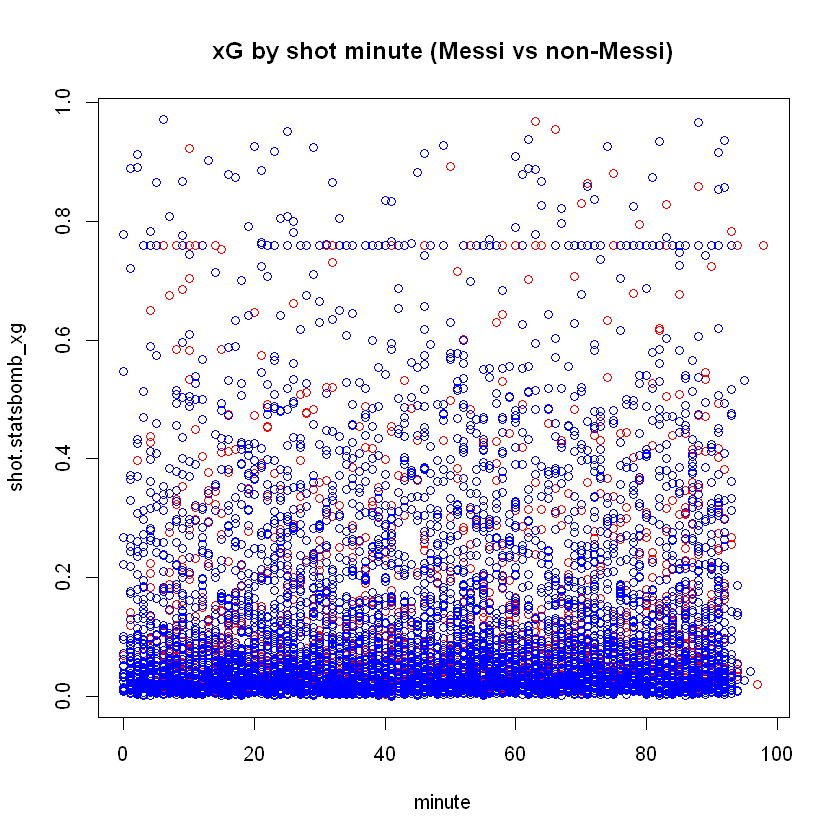

In [11]:
plot(shot.statsbomb_xg ~ minute, 
  data = shots[shots$player.name == 'Lionel Andrés Messi Cuccittini', ],
     col = "red",
     main = "xG by shot minute (Messi vs non-Messi)"
    )
points(shot.statsbomb_xg ~ minute, 
  data = shots[shots$player.name != 'Lionel Andrés Messi Cuccittini', ],
     col = "blue"
    )

# Ranking/part-to-whole analysis

In [12]:
library(lattice)

### Shots by Outcome

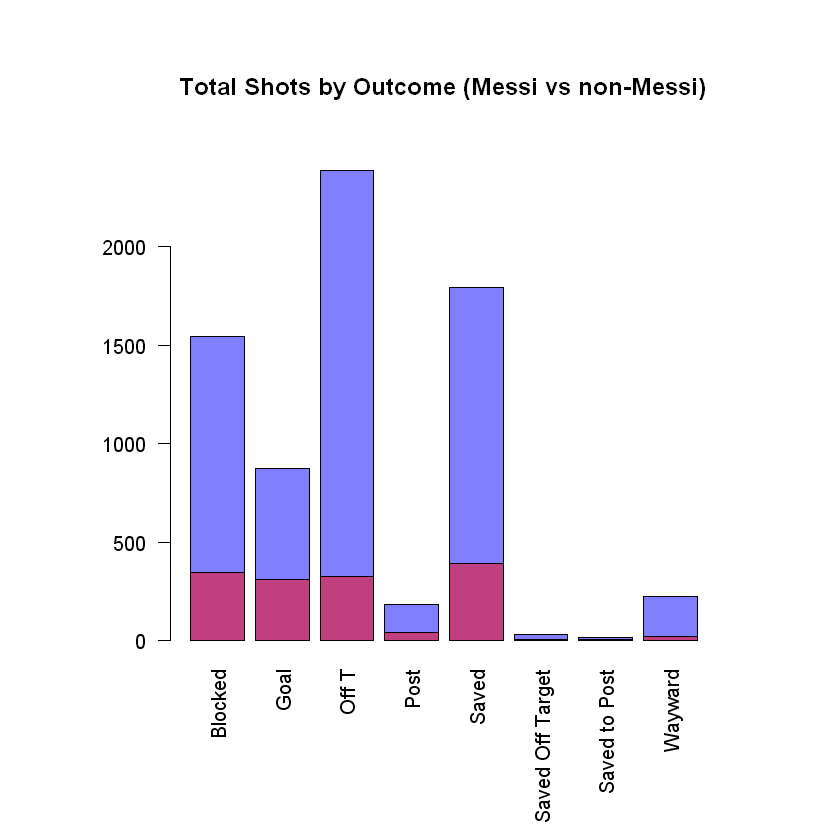

In [13]:
shots.by.outcome <- aggregate(x = shots$shot.statsbomb_xg[shots$player.name != 'Lionel Andrés Messi Cuccittini'], 
                               by = list(unique.values = shots$shot.outcome.name[shots$player.name != 'Lionel Andrés Messi Cuccittini']), 
                               FUN = length)
par(mar=par('mar')+c(3,3,3,3));
barplot(shots.by.outcome$x,
        names = shots.by.outcome$unique.values, 
     col = rgb(0,0,1,.5),
        las = 2,
        main = "Total Shots by Outcome (Messi vs non-Messi)"
    )

shots.by.outcome <- aggregate(x = shots$shot.statsbomb_xg[shots$player.name == 'Lionel Andrés Messi Cuccittini'], 
                               by = list(unique.values = shots$shot.outcome.name[shots$player.name == 'Lionel Andrés Messi Cuccittini']), 
                               FUN = length)
barplot(shots.by.outcome$x,
        names = shots.by.outcome$unique.values, 
     col = rgb(1,0,0,.5),
        las = 2,
        add = TRUE
    )

### xG by Outcome

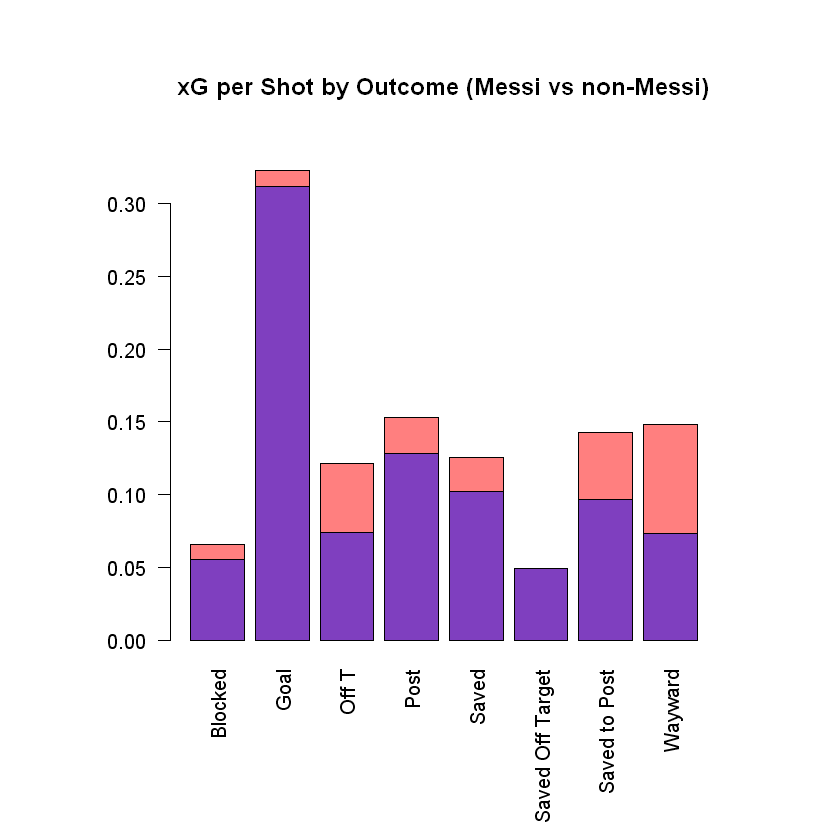

In [26]:
shots.by.outcome <- aggregate(x = shots$shot.statsbomb_xg[shots$player.name == 'Lionel Andrés Messi Cuccittini'], 
                               by = list(unique.values = shots$shot.outcome.name[shots$player.name == 'Lionel Andrés Messi Cuccittini']), 
                               FUN = mean)
par(mar=par('mar')+c(3,3,3,3));
barplot(shots.by.outcome$x,
        names = shots.by.outcome$unique.values, 
     col = rgb(1,0,0,.5),
        las = 2,
        main = "xG per Shot by Outcome (Messi vs non-Messi)"
    )

shots.by.outcome <- aggregate(x = shots$shot.statsbomb_xg[shots$player.name != 'Lionel Andrés Messi Cuccittini'], 
                               by = list(unique.values = shots$shot.outcome.name[shots$player.name != 'Lionel Andrés Messi Cuccittini']), 
                               FUN = mean)
barplot(shots.by.outcome$x,
        names = shots.by.outcome$unique.values, 
     col = rgb(0,0,1,.5),
        las = 2,
        add = TRUE
    )

### Shots by Type

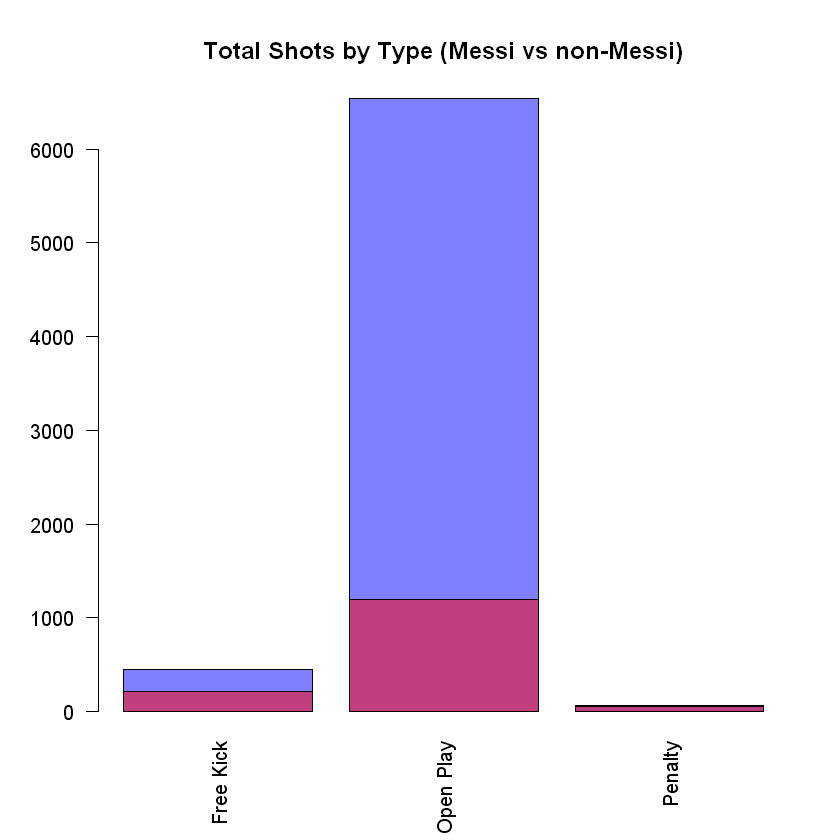

In [25]:
shots.by.type <- aggregate(x = shots$shot.statsbomb_xg[shots$player.name != 'Lionel Andrés Messi Cuccittini' & shots$shot.type.name != 'Corner'], 
                               by = list(unique.values = shots$shot.type.name[shots$player.name != 'Lionel Andrés Messi Cuccittini' & shots$shot.type.name != 'Corner']), 
                               FUN = length)
barplot(shots.by.type$x,
        names = shots.by.type$unique.values, 
     col = rgb(0,0,1,.5),
        las = 2,
        main = "Total Shots by Type (Messi vs non-Messi)"
    )

shots.by.type <- aggregate(x = shots$shot.statsbomb_xg[shots$player.name == 'Lionel Andrés Messi Cuccittini'], 
                               by = list(unique.values = shots$shot.type.name[shots$player.name == 'Lionel Andrés Messi Cuccittini']), 
                               FUN = length)
barplot(shots.by.type$x,
        names = shots.by.type$unique.values, 
     col = rgb(1,0,0,.5),
        las = 2,
        add = TRUE
    )

### xG by Shot type

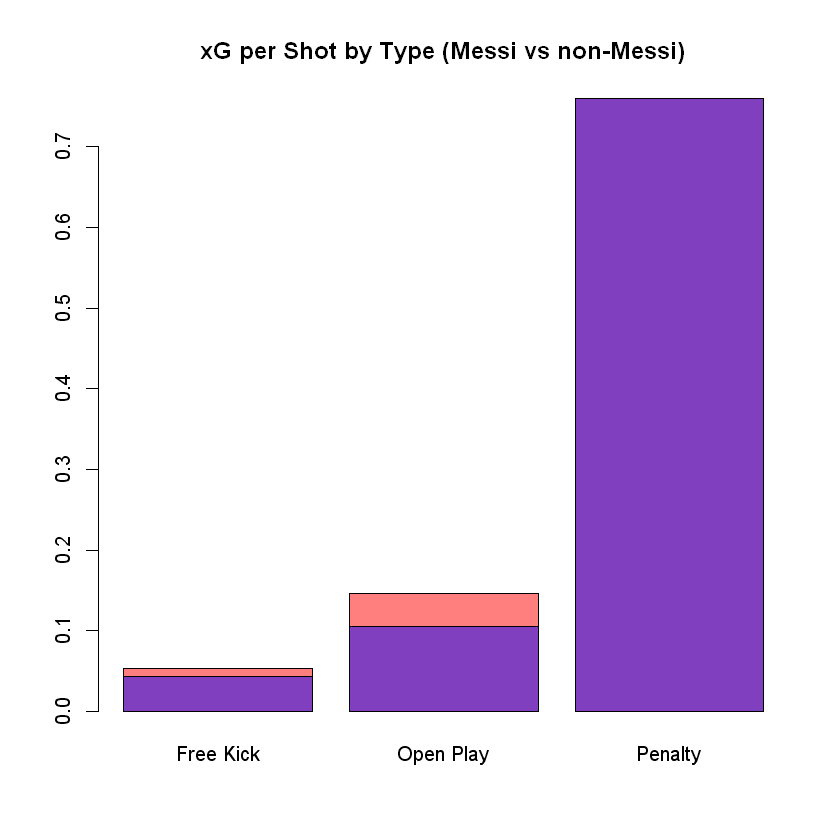

In [27]:
shots.by.type <- aggregate(x = shots$shot.statsbomb_xg[shots$player.name == 'Lionel Andrés Messi Cuccittini'], 
                               by = list(unique.values = shots$shot.type.name[shots$player.name == 'Lionel Andrés Messi Cuccittini']), 
                               FUN = mean)
barplot(shots.by.type$x,
        names = shots.by.type$unique.values, 
     col = rgb(1,0,0,.5),
#         las = 2,
        main = "xG per Shot by Type (Messi vs non-Messi)"
    )

shots.by.type <- aggregate(x = shots$shot.statsbomb_xg[shots$player.name != 'Lionel Andrés Messi Cuccittini' & shots$shot.type.name != 'Corner'], 
                               by = list(unique.values = shots$shot.type.name[shots$player.name != 'Lionel Andrés Messi Cuccittini' & shots$shot.type.name != 'Corner']), 
                               FUN = mean)
barplot(shots.by.type$x,
        names = shots.by.type$unique.values, 
     col = rgb(0,0,1,.5),
#         las = 2,
        add = TRUE
    )

### Shots by Play pattern

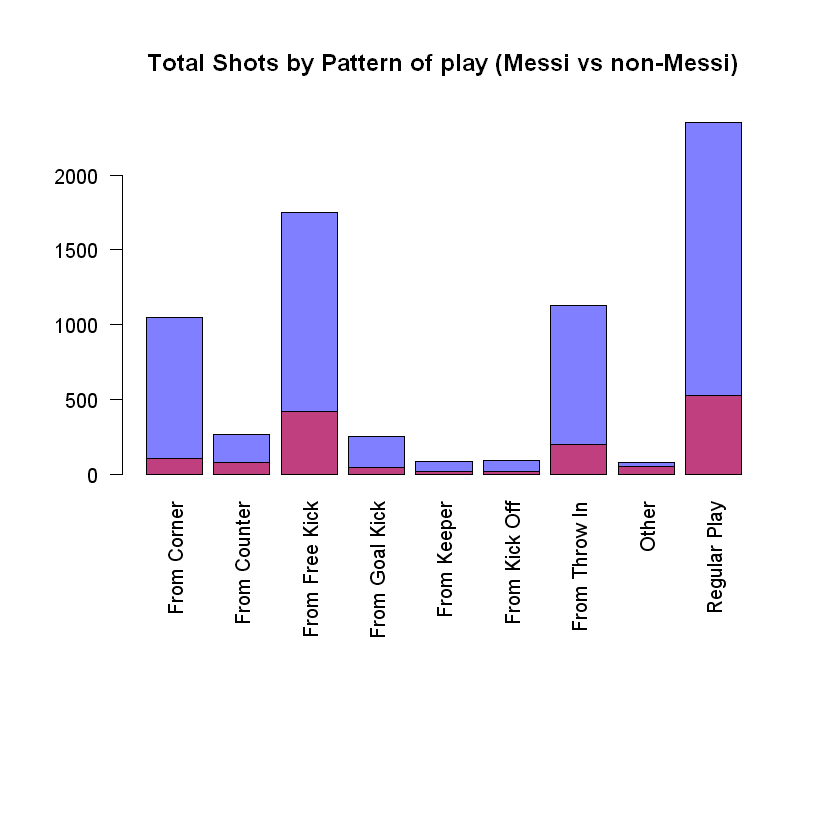

In [17]:
shots.by.play <- aggregate(x = shots$shot.statsbomb_xg[shots$player.name != 'Lionel Andrés Messi Cuccittini'], 
                               by = list(unique.values = shots$play_pattern.name[shots$player.name != 'Lionel Andrés Messi Cuccittini']), 
                               FUN = length)
par(mar=par('mar')+c(10,1,1,1));
barplot(shots.by.play$x,
        names = shots.by.play$unique.values, 
     col = rgb(0,0,1,.5),
        las = 2,
        main = "Total Shots by Pattern of play (Messi vs non-Messi)"
    )

shots.by.play <- aggregate(x = shots$shot.statsbomb_xg[shots$player.name == 'Lionel Andrés Messi Cuccittini'], 
                               by = list(unique.values = shots$play_pattern.name[shots$player.name == 'Lionel Andrés Messi Cuccittini']), 
                               FUN = length)
barplot(shots.by.play$x,
        names = shots.by.play$unique.values, 
     col = rgb(1,0,0,.5),
        las = 2,
        add = TRUE
    )

### xG by Play pattern

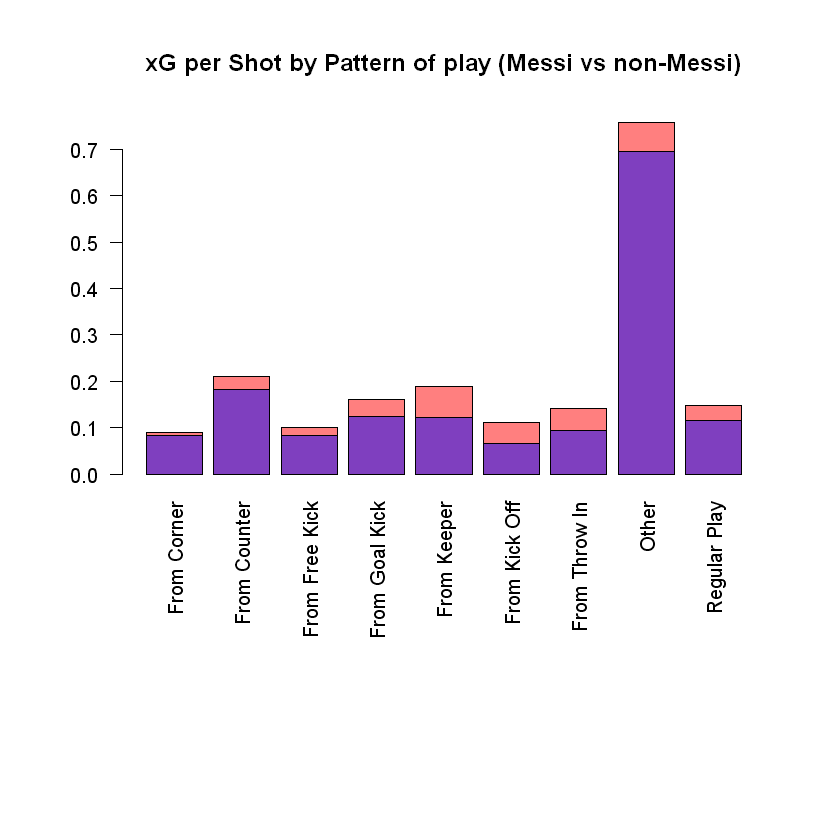

In [28]:
shots.by.play <- aggregate(x = shots$shot.statsbomb_xg[shots$player.name == 'Lionel Andrés Messi Cuccittini'], 
                               by = list(unique.values = shots$play_pattern.name[shots$player.name == 'Lionel Andrés Messi Cuccittini']), 
                               FUN = mean)
par(mar=par('mar')+c(10,1,1,1));
barplot(shots.by.play$x,
        names = shots.by.play$unique.values, 
     col = rgb(1,0,0,.5),
        las = 2,
        main = "xG per Shot by Pattern of play (Messi vs non-Messi)"
    )

shots.by.play <- aggregate(x = shots$shot.statsbomb_xg[shots$player.name != 'Lionel Andrés Messi Cuccittini'], 
                               by = list(unique.values = shots$play_pattern.name[shots$player.name != 'Lionel Andrés Messi Cuccittini']), 
                               FUN = mean)
barplot(shots.by.play$x,
        names = shots.by.play$unique.values, 
     col = rgb(0,0,1,.5),
        las = 2,
        add = TRUE
    )

# Distribution analysis

### xG distribution

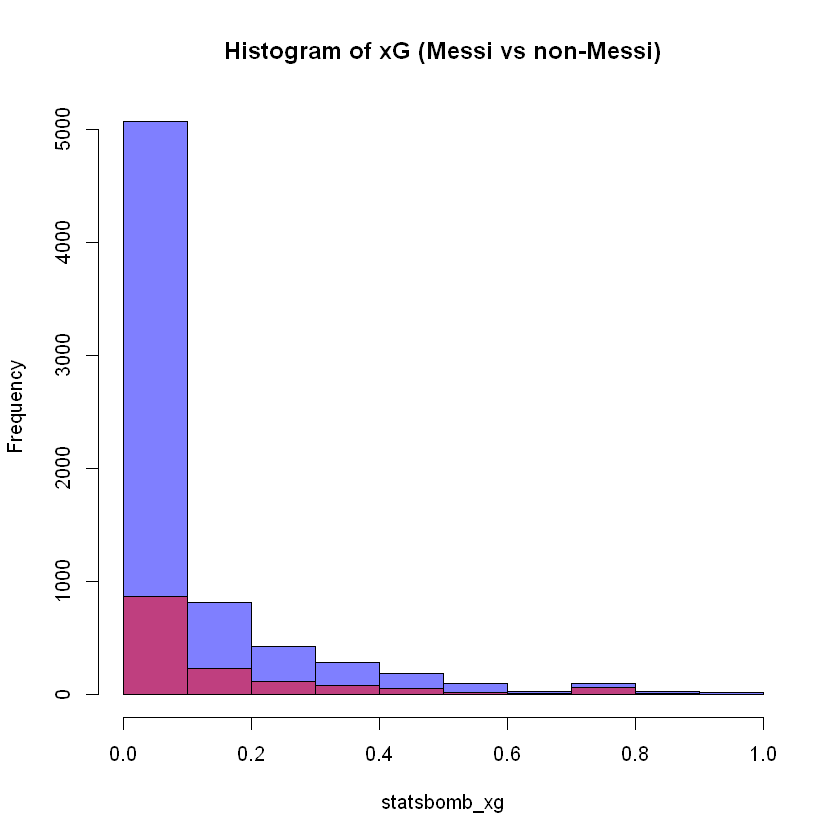

In [21]:
hist(shots$shot.statsbomb_xg[shots$player.name != 'Lionel Andrés Messi Cuccittini'],
     col = rgb(0,0,1,.5),
     breaks = 10,
     main = "Histogram of xG (Messi vs non-Messi)",
     xlab = "statsbomb_xg"
    )
hist(shots$shot.statsbomb_xg[shots$player.name == 'Lionel Andrés Messi Cuccittini'],
    col = rgb(1,0,0,.5), 
     breaks = 10,
     add = TRUE)

### Shot time distribution

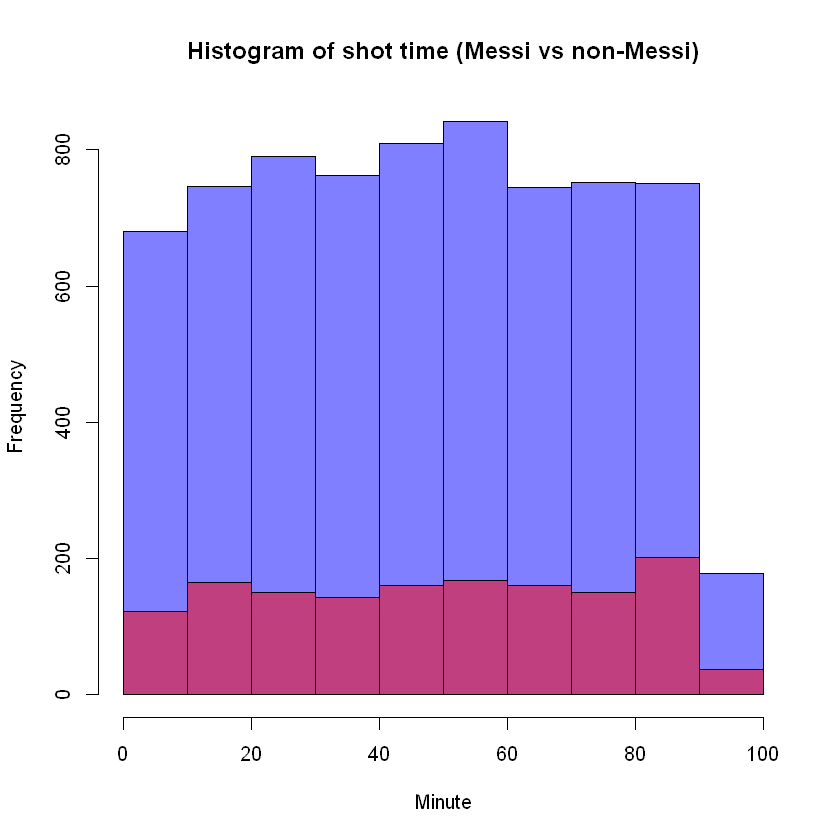

In [23]:
# layout(1:2)
hist(shots$minute[shots$player.name != 'Lionel Andrés Messi Cuccittini'],
    col = rgb(0,0,1,.5),
     breaks = 10,
     main = "Histogram of shot time (Messi vs non-Messi)",
     xlab = "Minute"
    )
hist(shots$minute[shots$player.name == 'Lionel Andrés Messi Cuccittini'], 
     col = rgb(1,0,0,.5),
     breaks = 10,
     add = TRUE)